In [1]:
#importing things
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from scipy.special import expit
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [2]:
##reading files
rider_provider='bank-marketing.csv'
data=pd.read_csv(rider_provider)

In [3]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 19)

### 1.Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

 #THE VALUES FOR 25,50 AND 75 percentiles ARE NEGATIVE AND THE PDAYS VALUES ARE NEGATIVE WHICH SEEMS FISHY HERE.

In [7]:
#Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [8]:
#WE CAN CONSIDER REMOVING THE NEGATIVE VALUES AS IT IS RESEMBLING THE MISSING RECORDS. 
#AS MANY VALUES ARE MISSING WE CANT GO FOR IT NOW

In [9]:
data.pdays[data.pdays>0].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [10]:
#removing negative values
data.drop(data[data.pdays < 0].index, inplace=True)


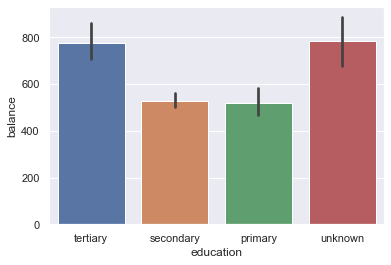

In [11]:
# horizontal bar chart for median values of education and balance relation
sns.set()
sns.barplot(x='education', y="balance", data=data, estimator=np.median)


In [12]:
print("thus the heighest median value is for the customers whose education details are not known")

thus the heighest median value is for the customers whose education details are not known


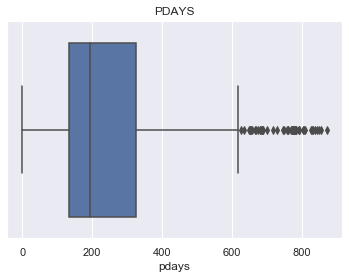

<Figure size 1440x720 with 0 Axes>

In [13]:
#plotting box plot
sns.set()
sns.boxplot(data.pdays)
plt.title("PDAYS")
plt.figure(figsize=(20,10))
plt.show()


In [14]:
data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [15]:
print("YES! I CAN SEE FEW OUTLIERS HERE IN THE pdays COLUMNS ")

YES! I CAN SEE FEW OUTLIERS HERE IN THE pdays COLUMNS 


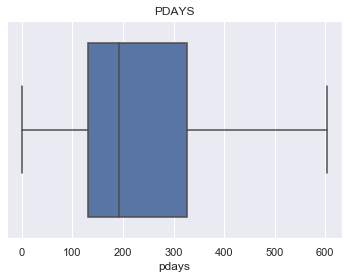

<Figure size 1440x720 with 0 Axes>

In [16]:
#NOW AS OUTLIERS ARE PRESENT I CAN NOT TRAIN WITH THIS SET THUS REMOVING OUTLIERS
data.drop(data[data.pdays > 610].index, inplace=True)
#plotting box plot
sns.set()
sns.boxplot(data.pdays)
plt.title("PDAYS")
plt.figure(figsize=(20,10))
plt.show()

In [17]:
print("removed outliers and thus ready to split and train")

removed outliers and thus ready to split and train


In [18]:
data.pdays.describe()

count    8206.000000
mean      221.359249
std       108.070094
min         1.000000
25%       131.000000
50%       193.000000
75%       326.000000
max       603.000000
Name: pdays, dtype: float64

In [19]:
data.mode()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,33,management,100000,married,secondary,yes,no,0,yes,no,cellular,18,may,158,1,182,1,failure,no


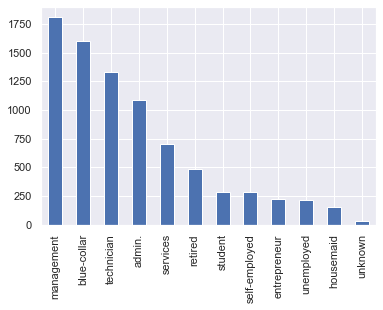

In [20]:
#performing EDA
data.job.value_counts().plot(kind="bar")


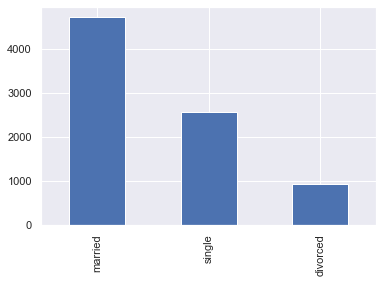

In [21]:
data.marital.value_counts().plot(kind="bar")

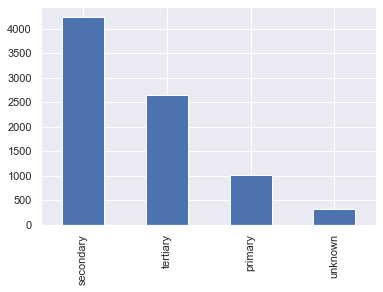

In [22]:
data.education.value_counts().plot(kind="bar")

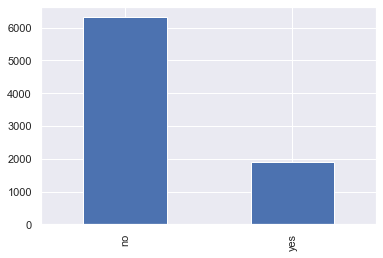

In [23]:
data.response.value_counts().plot(kind="bar")

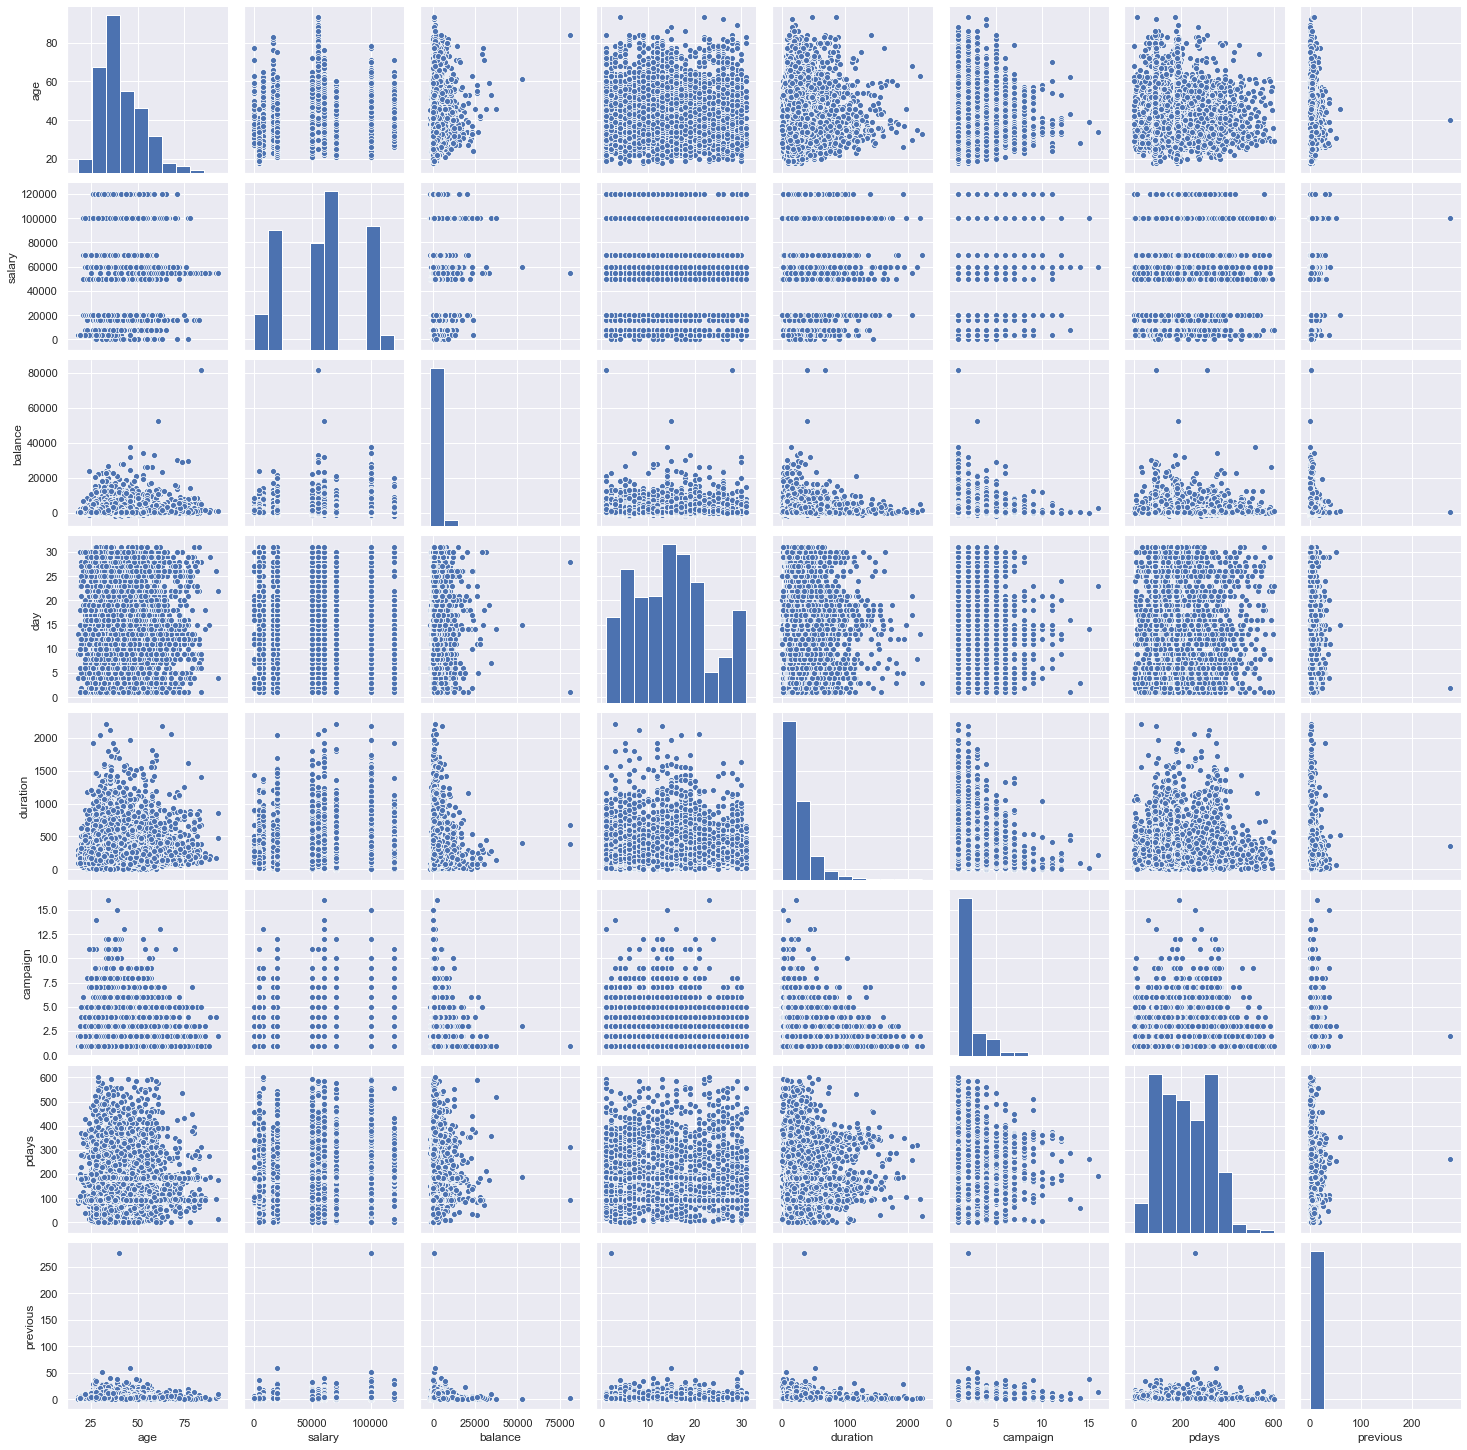

In [24]:
sns.pairplot(data = data)

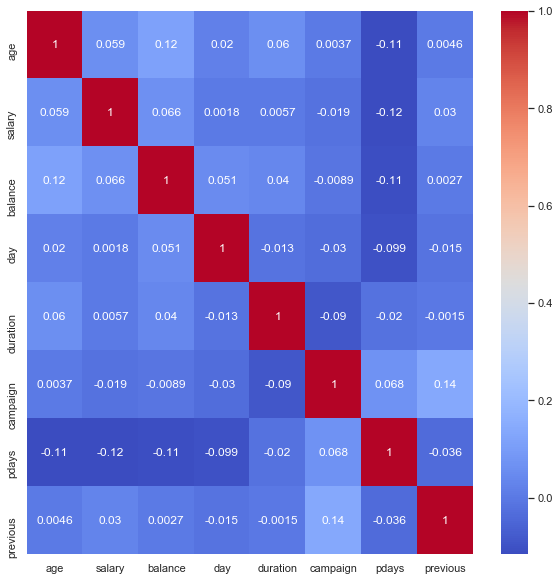

In [25]:
#identifying the multi-colinearity
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

##ConvertIng the response variable to a convenient form

In [26]:
#replacing the yeses with 1 and no with 0 in the review section as response are our required section for training
data.response.replace(('yes','no'),(1,0),inplace=True)

In [27]:
data.response.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [28]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


### Are the features about the previous campaign data useful

yes they are usefull as the responces says the engagement and sucess of the compaign

## Are pdays and poutcome associated with the target?

I DONT THINK SO AS PREVIOUS DATA WERE MISSING AND NO CONSISTANT RELATION WAS OBSERBED FROM THE DATASET AND THE MOSTLY RESPONSES WERE UNKNOWN THUS I DONT TAKE IT INTO MY CONSIDERATION

#performing logistic regression

In [29]:
numeric = ['age','balance', 'day', 'duration','campaign', 'pdays', 'previous']
categorical = ['job','marital','education','default','housing','loan','contact','month', 'poutcome']

In [30]:

scalar = StandardScaler()
scalar.fit(data[numeric])
data[numeric] = scalar.transform(data[numeric])
data

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,-0.695549,admin.,50000,married,tertiary,yes,no,-0.221024,no,no,telephone,0.847998,oct,-0.940571,-0.678107,-0.651092,-0.036953,failure,0
24062,0.091439,admin.,50000,single,secondary,yes,no,-0.589017,yes,yes,telephone,0.847998,oct,1.098789,-0.678107,-0.512284,-0.479959,other,1
24064,-0.695549,services,70000,married,secondary,yes,no,0.614048,yes,no,telephone,0.847998,oct,-0.494461,-0.678107,-1.206321,0.184550,failure,1
24072,-0.433219,management,100000,married,tertiary,yes,no,0.278650,yes,no,telephone,0.974287,oct,-0.796116,-0.678107,-1.252590,0.184550,other,0
24077,-0.433219,management,100000,married,tertiary,yes,no,-0.508508,yes,no,telephone,1.100576,oct,-0.511455,-0.678107,-0.725122,-0.036953,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,-0.608106,blue-collar,20000,single,secondary,yes,no,-0.027738,yes,no,cellular,0.216551,nov,3.847676,0.600658,2.856105,1.956572,other,0
45201,1.053313,management,100000,married,tertiary,yes,no,-0.318482,no,no,cellular,0.342840,nov,-0.146070,-0.678107,-0.345716,0.184550,success,1
45204,2.802175,retired,55000,married,secondary,yes,no,0.420437,no,no,cellular,0.342840,nov,0.168331,-0.678107,-1.678265,1.070561,failure,1
45208,2.714732,retired,55000,married,secondary,yes,no,1.354271,no,no,cellular,0.342840,nov,3.681978,1.879423,-0.345716,-0.036953,success,1


In [31]:
data = pd.get_dummies(data, columns=categorical,drop_first=True)   

data


,age,salary,targeted,balance,day,duration,campaign,pdays,previous,response,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
24060,-0.695549,50000,yes,-0.221024,0.847998,-0.940571,-0.678107,-0.651092,-0.036953,0,...,0,0,0,0,0,1,0,0,0,0
24062,0.091439,50000,yes,-0.589017,0.847998,1.098789,-0.678107,-0.512284,-0.479959,1,...,0,0,0,0,0,1,0,1,0,0
24064,-0.695549,70000,yes,0.614048,0.847998,-0.494461,-0.678107,-1.206321,0.184550,1,...,0,0,0,0,0,1,0,0,0,0
24072,-0.433219,100000,yes,0.278650,0.974287,-0.796116,-0.678107,-1.252590,0.184550,0,...,0,0,0,0,0,1,0,1,0,0
24077,-0.433219,100000,yes,-0.508508,1.100576,-0.511455,-0.678107,-0.725122,-0.036953,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,-0.608106,20000,yes,-0.027738,0.216551,3.847676,0.600658,2.856105,1.956572,0,...,0,0,0,0,1,0,0,1,0,0
45201,1.053313,100000,yes,-0.318482,0.342840,-0.146070,-0.678107,-0.345716,0.184550,1,...,0,0,0,0,1,0,0,0,1,0
45204,2.802175,55000,yes,0.420437,0.342840,0.168331,-0.678107,-1.678265,1.070561,1,...,0,0,0,0,1,0,0,0,0,0
45208,2.714732,55000,yes,1.354271,0.342840,3.681978,1.879423,-0.345716,-0.036953,1,...,0,0,0,0,1,0,0,0,1,0


In [32]:
data.columns

Index(['age', 'salary', 'targeted', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'response', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [33]:
X = data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
        'job_blue-collar', 'job_housemaid',
       'job_management', 'job_retired', 'job_services',
       'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown',
       'month_dec', 'month_feb', 'month_jan', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'] ]

y = data["response"]

In [34]:
OLS= sm.OLS(y,X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               response   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              245.5
Date:                Fri, 01 Jan 2021   Prob (F-statistic):                        0.00
Time:                        00:47:18   Log-Likelihood:                         -2725.3
No. Observations:                8206   AIC:                                      5519.
Df Residuals:                    8172   BIC:                                      5757.
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0129      0.005      2.476      0.013       0.003       0.023
balance                 0.0047      0.004      1.224      0.221      -0.003       0.012
duration                0.1169      0.004     30.766      0.000       0.109       0.124
campaign               -0.0129      0.004     -3.319      0.001      -0.020      -0.005
pdays                   0.0084      0.004      1.908      0.056      -0.000       0.017
previous                0.0053      0.004      1.406      0.160      -0.002       0.013
job_blue-collar         0.0219      0.012      1.860      0.063      -0.001       0.045
job_housemaid           0.0357      0.029      1.247      0.212      -0.020       0.092
job_management          0.0462      0.013      3.614      0.000       0.021       0.071
job_retired             0.0615      0.020      3.027      0.002       0.022       0.101
job_services            0.0299      0.015      1.987      0.047       0.000       0.059
job_student             0.1157      0.023      5.077      0.000       0.071       0.160
job_technician          0.0191      0.012      1.566      0.117      -0.005       0.043
job_unemployed          0.0956      0.024      3.907      0.000       0.048       0.144
marital_married         0.0756      0.011      7.174      0.000       0.055       0.096
marital_single          0.0899      0.012      7.259      0.000       0.066       0.114
education_secondary     0.0835      0.010      7.988      0.000       0.063       0.104
education_tertiary      0.1048      0.013      7.905      0.000       0.079       0.131
education_unknown       0.0898      0.021      4.251      0.000       0.048       0.131
housing_yes            -0.0833      0.009     -9.555      0.000      -0.100      -0.066
loan_yes               -0.0304      0.011     -2.730      0.006      -0.052      -0.009
contact_telephone      -0.0271      0.015     -1.864      0.062      -0.056       0.001
contact_unknown        -0.0218      0.049     -0.445      0.656      -0.118       0.074
month_dec               0.0821      0.032      2.568      0.010       0.019       0.145
month_feb               0.0095      0.013      0.752      0.452      -0.015       0.034
month_jan              -0.0559      0.016     -3.412      0.001      -0.088      -0.024
month_jun               0.1466      0.020      7.292      0.000       0.107       0.186
month_mar               0.2072      0.027      7.756      0.000       0.155       0.260
month_may              -0.0178      0.010     -1.823      0.068      -0.037       0.001
month_oct               0.1401      0.020      7.091      0.000       0.101       0.179
month_sep               0.1670      0.021      8.026      0.000       0.126     

__'default_yes' , 'job_unknown', 'month_nov', 'month_aug', , 'job_entrepreneur' , 'job_self-employed', 'month_jul' , 'day' as been removed as the p-value of the variables are greater than 0.05 which means they are not significant

LOGISTIC REGRESSION

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=33)

In [36]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
model = lgr.fit(X_train,np.array(y_train))
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [37]:
y_pred = lgr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [38]:

cvs = cross_val_score(model, X_train, y_train, cv=5)
np.mean(cvs)

0.8408767812034703

### USING RFETHUS THE ACCURECY OF THE MODE IS APPROX 84.08%

In [39]:

print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.92      0.90      1912
           1       0.66      0.53      0.59       550

    accuracy                           0.84      2462
   macro avg       0.77      0.73      0.74      2462
weighted avg       0.83      0.84      0.83      2462



### USING RFE

In [40]:

rfe = RFE(lgr, 15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [41]:

rfe = RFE(lgr, 15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [42]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lgr.fit(X_train[cols],y_train)
y_pred2 = lgr.predict(X_test[cols])

Index(['duration', 'job_blue-collar', 'job_housemaid', 'job_student',
       'job_unemployed', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_jan', 'month_jun', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'poutcome_success'],
      dtype='object')


### FEATURE IMPORTANCE

In [43]:

model = SelectFromModel(lgr)
model.fit(X_train,y_train)
features = model.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['duration', 'job_blue-collar', 'housing_yes', 'loan_yes', 'month_jan',
       'month_jun', 'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_success'],
      dtype='object')

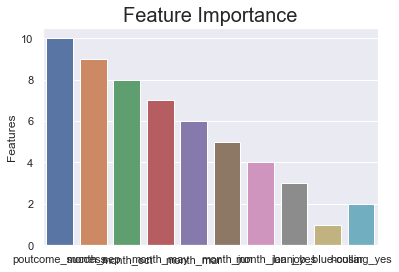

In [44]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.set(rc={'figure.figsize':(35,35)})
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## RANDOM FOREST

In [45]:

rf = RandomForestClassifier(n_estimators=45,random_state=0,max_depth=30)
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [46]:

cvs = cross_val_score(rf, X_train, y_train, cv=5)
np.mean(cvs)

0.8478399638528277

### THE ACCURACY OF THE MODEL IS 84.8% APPROX

In [47]:
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.88      0.93      0.90      1912
           1       0.69      0.54      0.61       550

    accuracy                           0.84      2462
   macro avg       0.78      0.74      0.76      2462
weighted avg       0.84      0.84      0.84      2462



SINCE THE ACCURACY OF RANDOM FOREST IS SLIGHTLY MORE THAN THE ACCURACY OF LOGISTIC I WILL GO FOR RANDOM FOREST.
AND ALSO F1 SCORE INCREASES IN  THE CASE OF RANDOM FOREST WHICH IS ALSO A RESON FOR ME TO GOING WITH THE RANDOM FOREST.